In [82]:
# Mengimpor library pandas
import pandas as pd

# Membaca dataset ObesityDataSet.csv
df = pd.read_csv('/content/ObesityDataSet.csv')

In [83]:
# Menampilkan 5 baris pertama dataset
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [84]:
# Menampilkan jumlah baris dan kolom dalam dataset
print("Jumlah Baris dan Kolom:", df.shape)

Jumlah Baris dan Kolom: (2111, 17)


In [85]:
# Menampilkan ringkasan informasi dataset (jumlah non-null, tipe data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [86]:
# Menampilkan tipe data masing-masing kolom
df.dtypes

,0
Age,object
Gender,object
Height,object
Weight,object
CALC,object
FAVC,object
FCVC,object
NCP,object
SCC,object
SMOKE,object


In [87]:
# Menampilkan statistik deskriptif semua kolom (termasuk kategorikal)
df.describe(include='all')

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [88]:
# Membuat salinan data yang telah dibersihkan dari duplikat
df_cleaned = df.copy()

# Cek dan hapus duplikat
df_cleaned = df_cleaned.drop_duplicates()

In [89]:
# Cek missing values
df_cleaned.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [90]:
# Konversi kolom numerik ke float
for col in ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Tangani missing values: numerik → median, kategorikal → modus
# Kolom numerik
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in num_cols:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Kolom kategorikal/biner
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for col in cat_cols:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Pastikan sudah tidak ada missing values
df_cleaned.isnull().sum()

<ipython-input-90-d74b74d6d30c>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-90-d74b74d6d30c>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [91]:
# Konversi kolom numerik yang masih bertipe object
cols_to_convert = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in cols_to_convert:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')  # jika ada error parse, akan jadi NaN

# Periksa kembali tipe data
print(df_cleaned.dtypes)

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [92]:
# Deteksi data outlier
from scipy.stats import zscore
import numpy as np

z_scores = np.abs(zscore(df_cleaned[num_cols]))
outliers = (z_scores > 3).any(axis=1)

print(f"Jumlah data outlier: {outliers.sum()}")

Jumlah data outlier: 91


In [93]:
# Standarisasi data numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

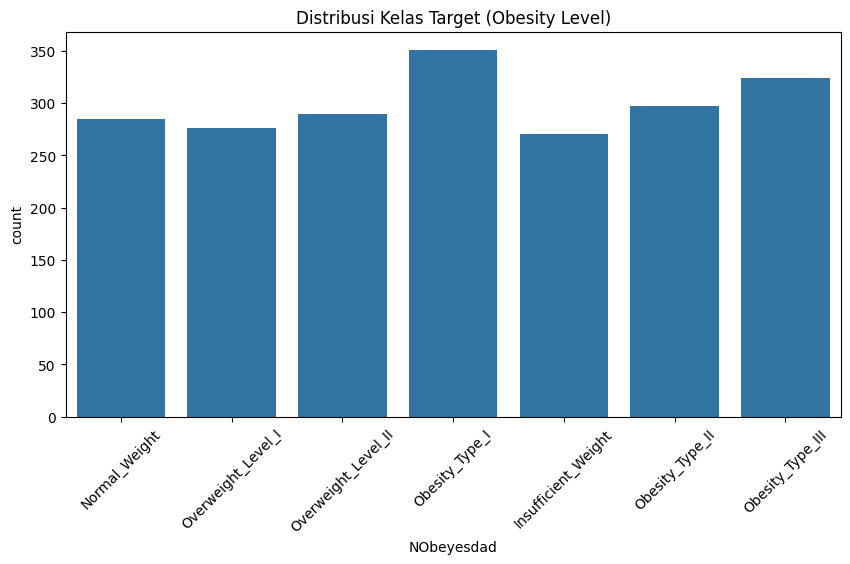

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='NObeyesdad', data=df_cleaned)
plt.title('Distribusi Kelas Target (Obesity Level)')
plt.xticks(rotation=45)
plt.show()

In [95]:
# Memisahkan fitur dan target
X = df_cleaned.drop('NObeyesdad', axis=1)
y = df_cleaned['NObeyesdad']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [96]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# 1. Pisahkan kolom numerik dan kategori
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# 2. Imputasi
num_imputer = SimpleImputer(strategy='median')
X_train_num = pd.DataFrame(num_imputer.fit_transform(X_train[numerical_cols]), columns=numerical_cols)
X_test_num = pd.DataFrame(num_imputer.transform(X_test[numerical_cols]), columns=numerical_cols)

cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train[categorical_cols]), columns=categorical_cols)
X_test_cat = pd.DataFrame(cat_imputer.transform(X_test[categorical_cols]), columns=categorical_cols)

# 3. Onehot encoding kategori
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train_cat)

X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat), columns=encoder.get_feature_names_out(categorical_cols))
X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test_cat), columns=encoder.get_feature_names_out(categorical_cols))

# 4. Gabungkan kembali
X_train_final = pd.concat([X_train_num.reset_index(drop=True), X_train_cat_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_num.reset_index(drop=True), X_test_cat_encoded.reset_index(drop=True)], axis=1)

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svc = SVC()

rf.fit(X_train_final, y_train)
knn.fit(X_train_final, y_train)
svc.fit(X_train_final, y_train)

SVC()

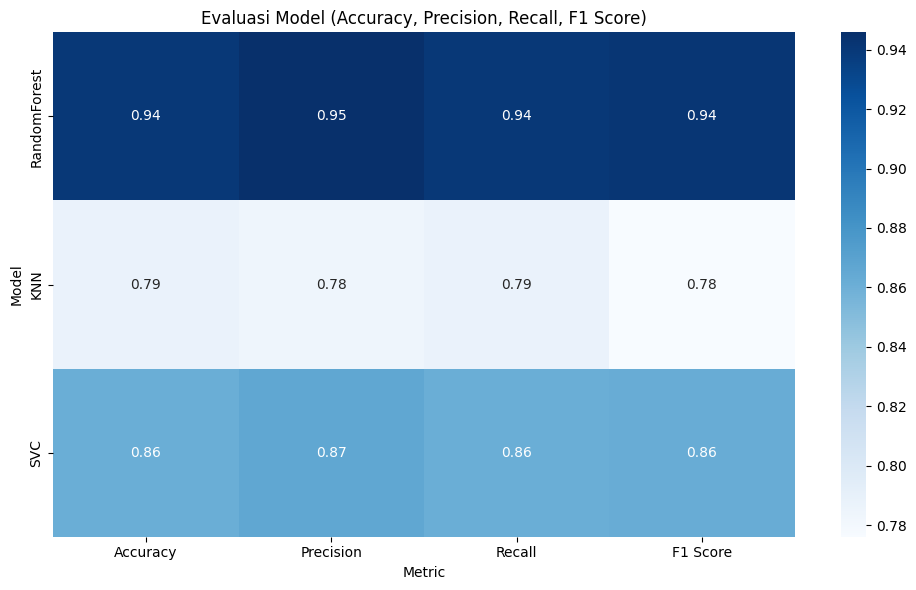

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prediksi model
y_pred_rf = rf.predict(X_test_final)
y_pred_knn = knn.predict(X_test_final)
y_pred_svc = svc.predict(X_test_final)

# Evaluasi fungsi
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_true, y_pred, average='weighted', zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

# Evaluasi setiap model
eval_rf = evaluate_model(y_test, y_pred_rf)
eval_knn = evaluate_model(y_test, y_pred_knn)
eval_svc = evaluate_model(y_test, y_pred_svc)

# Buat dataframe hasil evaluasi
results_df = pd.DataFrame({
    'RandomForest': eval_rf,
    'KNN': eval_knn,
    'SVC': eval_svc
})

# Transpose agar model jadi sumbu X
results_df = results_df.T

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap='Blues', fmt=".2f")
plt.title("Evaluasi Model (Accuracy, Precision, Recall, F1 Score)")
plt.xlabel("Metric")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

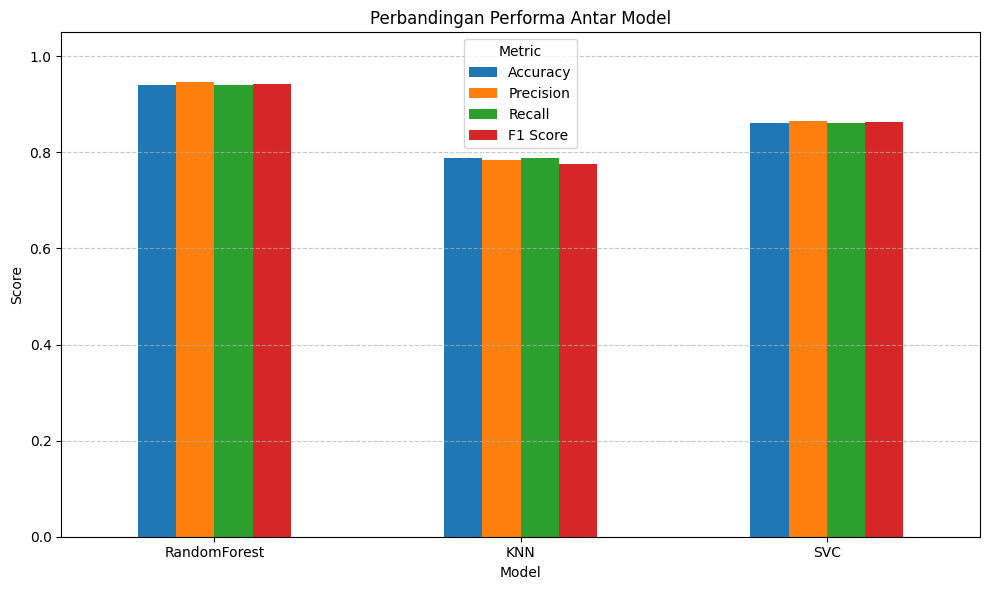

In [99]:
# Bar chart sebagai pelengkap setelah heatmap
plt.figure(figsize=(10, 6))

# Plot bar chart dari dataframe yang telah ditranspose (results_df sudah hasil evaluasi)
results_df.plot(kind='bar', figsize=(10, 6))

plt.title("Perbandingan Performa Antar Model")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

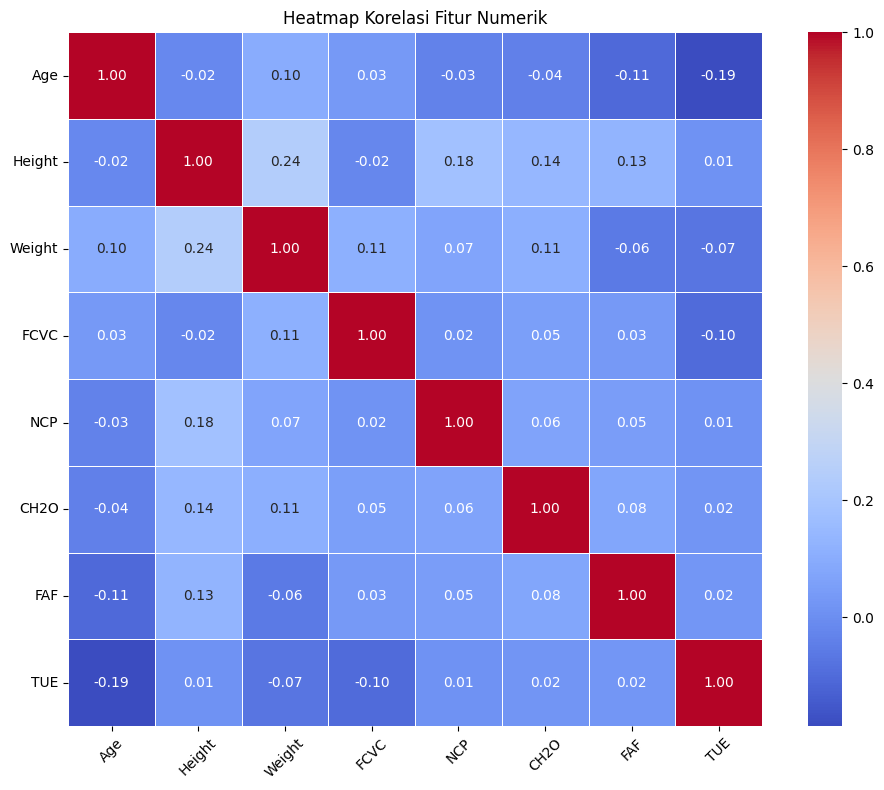

In [100]:
# Hitung korelasi hanya untuk fitur numerik
correlation_matrix = X_train_num.corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Heatmap Korelasi Fitur Numerik")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [101]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk setiap model
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svc = SVC(probability=True)

# GridSearchCV
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)

# Latih model
grid_rf.fit(X_train_final, y_train)
grid_knn.fit(X_train_final, y_train)
grid_svc.fit(X_train_final, y_train)

# Simpan model terbaik
best_rf = grid_rf.best_estimator_
best_knn = grid_knn.best_estimator_
best_svc = grid_svc.best_estimator_

# Print parameter terbaik
print("Best parameters RF:", grid_rf.best_params_)
print("Best parameters KNN:", grid_knn.best_params_)
print("Best parameters SVC:", grid_svc.best_params_)

Best parameters RF: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best parameters SVC: {'C': 10, 'kernel': 'rbf'}


In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Hypertuning untuk random forest
# Parameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Inisialisasi dan GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_final, y_train)

# Simpan model terbaik
best_rf = grid_rf.best_estimator_

# Cetak parameter terbaik
print("Best parameters RF:", grid_rf.best_params_)

Best parameters RF: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [103]:
from sklearn.neighbors import KNeighborsClassifier
# Hypertuning untuk KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train_final, y_train)

best_knn = grid_knn.best_estimator_
print("Best parameters KNN:", grid_knn.best_params_)

Best parameters KNN: {'n_neighbors': 3, 'weights': 'distance'}


In [104]:
from sklearn.svm import SVC
# Hypertuning untuk SVC
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svc = SVC(probability=True)
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train_final, y_train)

best_svc = grid_svc.best_estimator_
print("Best parameters SVC:", grid_svc.best_params_)

Best parameters SVC: {'C': 10, 'kernel': 'rbf'}


In [105]:
# Prediksi menggunakan model terbaik
y_pred_best_rf = best_rf.predict(X_test_final)
y_pred_best_knn = best_knn.predict(X_test_final)
y_pred_best_svc = best_svc.predict(X_test_final)

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluasi performa model terbaik
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_true, y_pred, average='weighted', zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

eval_best_rf = evaluate_model(y_test, y_pred_best_rf)
eval_best_knn = evaluate_model(y_test, y_pred_best_knn)
eval_best_svc = evaluate_model(y_test, y_pred_best_svc)

In [107]:
# Membuat dataframe untuk hasil evaluasi setelah tuning
tuned_results_df = pd.DataFrame({
    'RandomForest (Tuned)': eval_best_rf,
    'KNN (Tuned)': eval_best_knn,
    'SVC (Tuned)': eval_best_svc
}).T

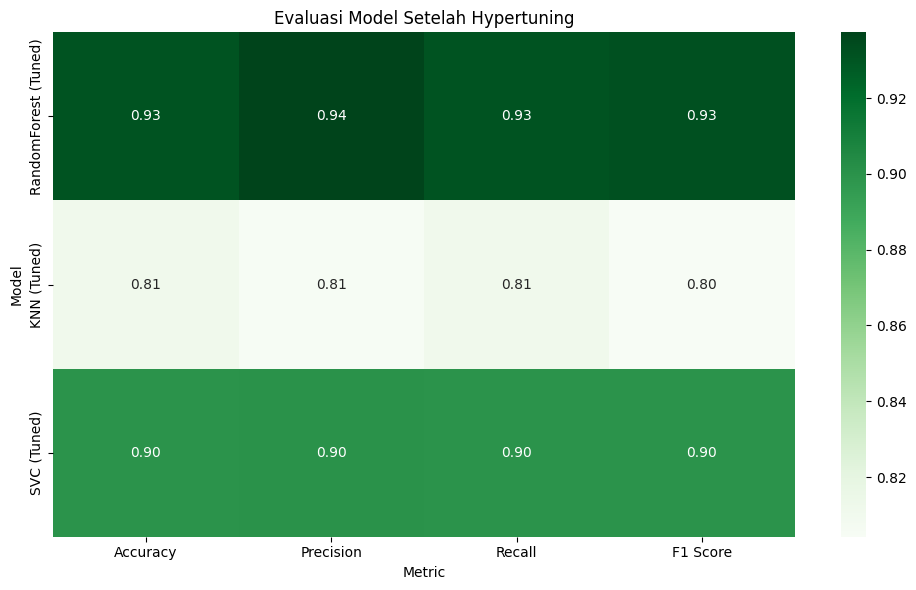

In [108]:
# Menampilkan heatmap hasil setelah tuning
plt.figure(figsize=(10, 6))
sns.heatmap(tuned_results_df, annot=True, cmap='Greens', fmt=".2f")
plt.title("Evaluasi Model Setelah Hypertuning")
plt.xlabel("Metric")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

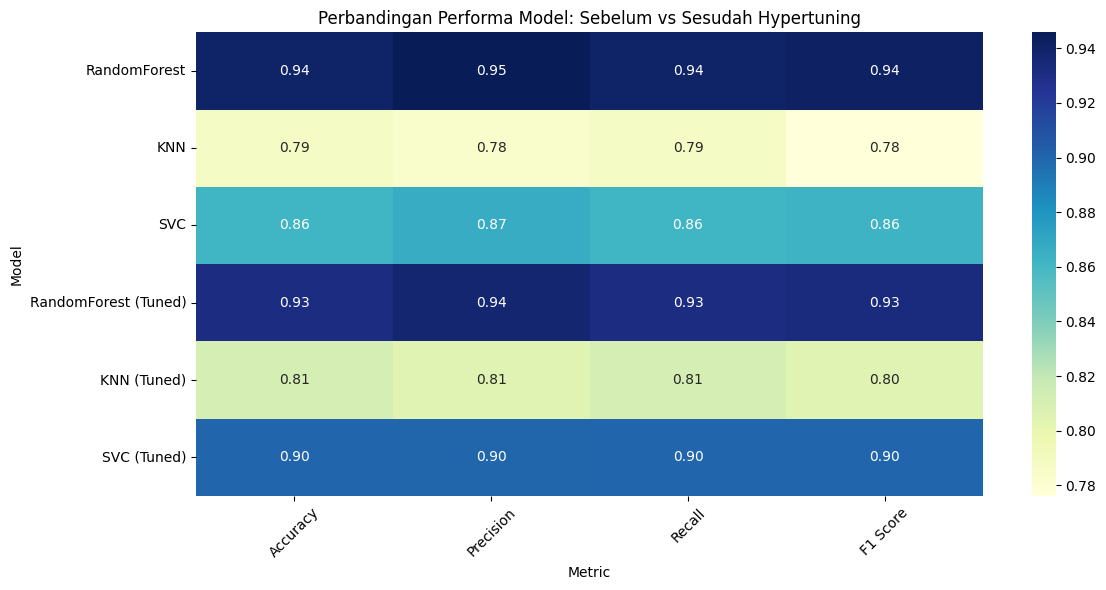

In [109]:
# Gabungkan kedua hasil
combined_results = pd.concat([results_df, tuned_results_df])

# Plot heatmap perbandingan sebelum dan setelah tuning
plt.figure(figsize=(12, 6))
sns.heatmap(combined_results, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Perbandingan Performa Model: Sebelum vs Sesudah Hypertuning")
plt.xlabel("Metric")
plt.ylabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Setelah dilakukan serangkaian eksperimen pada tiga algoritma klasifikasi yaitu Random Forest, K-Nearest Neighbors (KNN), dan Support Vector Classifier (SVC), diperoleh beberapa temuan menarik dari proses evaluasi sebelum dan sesudah dilakukan hyperparameter tuning.

Sebelum Tuning
Ketiga model sudah menunjukkan performa yang cukup baik. Nilai akurasi, precision, recall, dan F1-score semuanya berada di atas standar minimal yang diharapkan. Dari hasil heatmap dan grafik bar, terlihat bahwa Random Forest unggul sedikit di atas KNN dan SVC.

Setelah Tuning (Hyperparameter Tuning)
Setelah dilakukan proses tuning menggunakan GridSearchCV, ternyata terjadi peningkatan performa pada KNN dan SVC. Hal ini menunjukkan bahwa pemilihan parameter yang lebih optimal mampu meningkatkan kemampuan model dalam melakukan klasifikasi.

Namun, pada model Random Forest, performanya justru sedikit menurun (sekitar 0.01). Kemungkinan besar hal ini disebabkan oleh kombinasi parameter yang kurang cocok terhadap karakteristik dataset, atau bisa juga karena model default sebelumnya memang sudah cukup optimal tanpa perlu banyak penyesuaian.

Perbandingan Sebelum dan Sesudah Tuning
Dari hasil perbandingan akhir, bisa disimpulkan bahwa tuning punya pengaruh cukup signifikan terhadap model KNN dan SVC, terutama dalam meningkatkan skor evaluasi. Meskipun Random Forest mengalami sedikit penurunan, selisihnya masih tergolong kecil dan tidak terlalu berdampak besar secara keseluruhan.